# Basics

The syntax for slicing arrays in NumPy is similar to that of the built-in lists. However, these work very differently. For instance:

* NumPy slices are simply **views** of the original array. This means that the data is not copied. Any changes you make to the view will be reflected in the original array. This is called **broadcasting**.
* You can assign both a scalar value and an iterable to a NumPy array, whereas only iterables can be assigned to Python lists.


## One-dimensional arrays

In [1]:
import numpy as np

In [2]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
arr[3]

3

In [4]:
arr[3:6]

array([3, 4, 5])

Lets apply an *iterable* to the slice above.

*Note: The shape of the iterable being added e.g. the input array **must** be of the same shape as the slice!*

In [5]:
arr[3:6] = [15, 16, 17]

In [6]:
arr

array([ 0,  1,  2, 15, 16, 17,  6,  7,  8,  9])

See how the third, fourth and fifth index changes their values. Lets overwrite them with a scalar value using array slicing.

In [7]:
arr[3:6] = 20

In [8]:
arr

array([ 0,  1,  2, 20, 20, 20,  6,  7,  8,  9])

This operation is not possible in built-in lists!

    py_list = list(range(10))
    py_list[3:6] = 20
    
The code block above will raise the folloing error: `TypeError: can only assign an iterable`

Following the example above, if we do a full slice and assign a new value, the whole array will change:

In [9]:
arr[:] = 20

In [10]:
arr

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20])

### Copying an array using `copy` method

By using the `copy` method, we can copy the view into another array object and make modifications there while keeping the source array intact. Here, we will copy `arr` entirely into a new array object and change certain values. We can see at the end that `arr` still remains intact.

In [11]:
arr2 = arr[:].copy()

In [12]:
arr2[3:6] = 15

In [13]:
arr2

array([20, 20, 20, 15, 15, 15, 20, 20, 20, 20])

In [14]:
arr

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20])

## Multi-dimensional arrays

### Two-dimensional arrays

#### What is a two-dimensional array?

In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays. You can imagine this as being an array within an array.

In [15]:
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [16]:
arr_2d[1]

array([4, 5, 6])

In [17]:
arr_2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

#### Indexing 2D arrays

We can access individual arrays e.g. the one-dimensional arrays by simply using the following syntax:

    array[index]

Here is an example:

In [18]:
arr_2d[1]

array([4, 5, 6])

There are two ways of accessing individual elements inside this one-dimensional array:

* Like we do usually in Python: `array[index][index]`

OR

* As comma separated values: `array[index, index]`

In [19]:
arr_2d[1][2]

6

In [20]:
arr_2d[1, 2]

6

Check out this image below. It shows you an easy way to refer to a two-dimensional indexing. Try to imagine this as a plane in the Cartesian Coordinate System with the rows being the x-axis (axis 0) and the columns being the y-axis (axis 1).

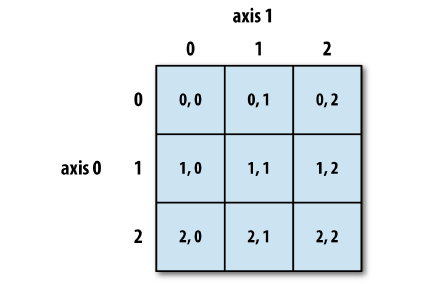

Note that at the [beginning of this section](#Indexing-2D-arrays) we accessed the entirity of a row e.g. a 1D array. We did so by not providing another level of indexing. 

In multi-dimensional arrays, if we do not provide further indices, we get an ndarray of the lowest dimension. Here, since we indexed once, we get a 1D array. [This can be seen better in 3D arrays](#Indexing-3D-arrays).

### Three-dimensional arrays

#### What is a three-dimensional array?

A three-dimensional array is where there are `x` number of arrays, within which there are `y` number of arrays containing `z` number of elements. Therefore, the shape of a 3D array is *x-by-y-by-z*.

In [47]:
array_3d = np.array([
    [
        [1, 2, 3],
        [4, 5, 6]
    ],
    [
        [7, 8, 9],
        [10, 11, 12],
    ],
    [
        [13, 14, 15],
        [16 ,17, 18],
    ]
])

The array above is an example of a 3D array. This array has 3 arrays, each containing 2 arrays of 3 elements. By plugging in these numbers with the *x-by-y-by-z* example, we can say that this 3D array's shape is 3x2x3. 

Lets create the same 3D array with the help of `np.arange`:

In [22]:
array_3d = np.arange(1, 19)

In [23]:
array_3d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [24]:
array_3d = array_3d.reshape(3, 2, 3)

In [25]:
array_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])

#### Indexing 3D arrays

If we do not provide further indices on 3D arrays, we will get a 2D array with the shape 2x3:

In [32]:
array_3d[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

If we now provide one more index, we get a 1D array with the shape 1x3:

In [35]:
array_3d[1, 0] # OR array_3d[1][0]

array([7, 8, 9])

If we want to access an individual element e.g. `8` we add a further index and get the required scalar value:

In [27]:
array_3d[1, 0, 1]

8

### Assigning scalar values and arrays

Scalar values can be assigned to all elements in any dimensions. We will use the 3D array `array_3d` for to do that. 

Let us first copy the values of 2x3 array in the first index. After that, we will define all elements inside this array to `2`. 

In [50]:
old_values = array_3d[1].copy()

In [51]:
old_values

array([[ 7,  8,  9],
       [10, 11, 12]])

In [52]:
array_3d[1] = 2
array_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 2,  2,  2],
        [ 2,  2,  2]],

       [[13, 14, 15],
        [16, 17, 18]]])

Now lets change one of those 2s into a 10:

In [53]:
array_3d[1, 0, 2] = 10
array_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 2,  2, 10],
        [ 2,  2,  2]],

       [[13, 14, 15],
        [16, 17, 18]]])

Now, lets revert the state of `array_3d`. We will now assign the 2x3 ndarray `old_values` to the similarly shaped array in the first index of `array_3d`:

In [54]:
array_3d[1] = old_values

In [55]:
array_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])

Why did we *copy* the value of the first index of `array_3d` into `old_values` by using the `copy` method? It is because indexes and slices are views into those arrays! Otherwise, if we modified `old_values`, `array_3d` would have been modified too!

Two points here:
* the copy could have been done via slicing, which we will look into in the following section
* lets change the value of `old_values` and see if it affects `array_3d`

In [59]:
old_values[0] = 0
old_values

array([[ 0,  0,  0],
       [10, 11, 12]])

In [60]:
array_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])

### Slicing